Machine Learning Project: Dropout and Academic Success Prediction

Project Details:
The goal of this project is to use student data to be able to predict whether a student is at risk of dropping out early in their academic career in higher education. We will first do exploratory data analysis (EDA) to assess the quality of the data. Then we will use different machine learning algorithms to determine the best model for the data. The taget classifications for this problem will be 'dropout', 'enrolled', and 'graduated'.

Data:

The dataset used for this project is from the UC Irvine Machine Learning Repository. The data set has 4424 instances (rows) and has 36 features (columns). All of the data has been converted to numeric values except for the 'Target' column for the classification. The dataset has both numeric and categorical features. For more information, click on the link below.
Dataset Link: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [23]:
import math
import pickle
import gzip
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from math import exp
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from scipy.stats import randint
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [24]:
# import data from csv file into a dataframe
df = pd.read_csv('data/dropout_data.csv', sep = ';')
df['Target'] = df.Target.values.astype(object)
encoder = preprocessing.LabelEncoder()
encoder.fit(df['Target'])
df['Target'] = encoder.transform(df['Target'])
df.head()
num_class = pd.crosstab(index= df['Target'], columns="count") 
print(num_class)

col_0   count
Target       
0        1421
1         794
2        2209


/Users/School/Documents/Github/ML_StudentDropoutPredictor/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.draw()
/Users/School/Documents/Github/ML_StudentDropoutPredictor/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


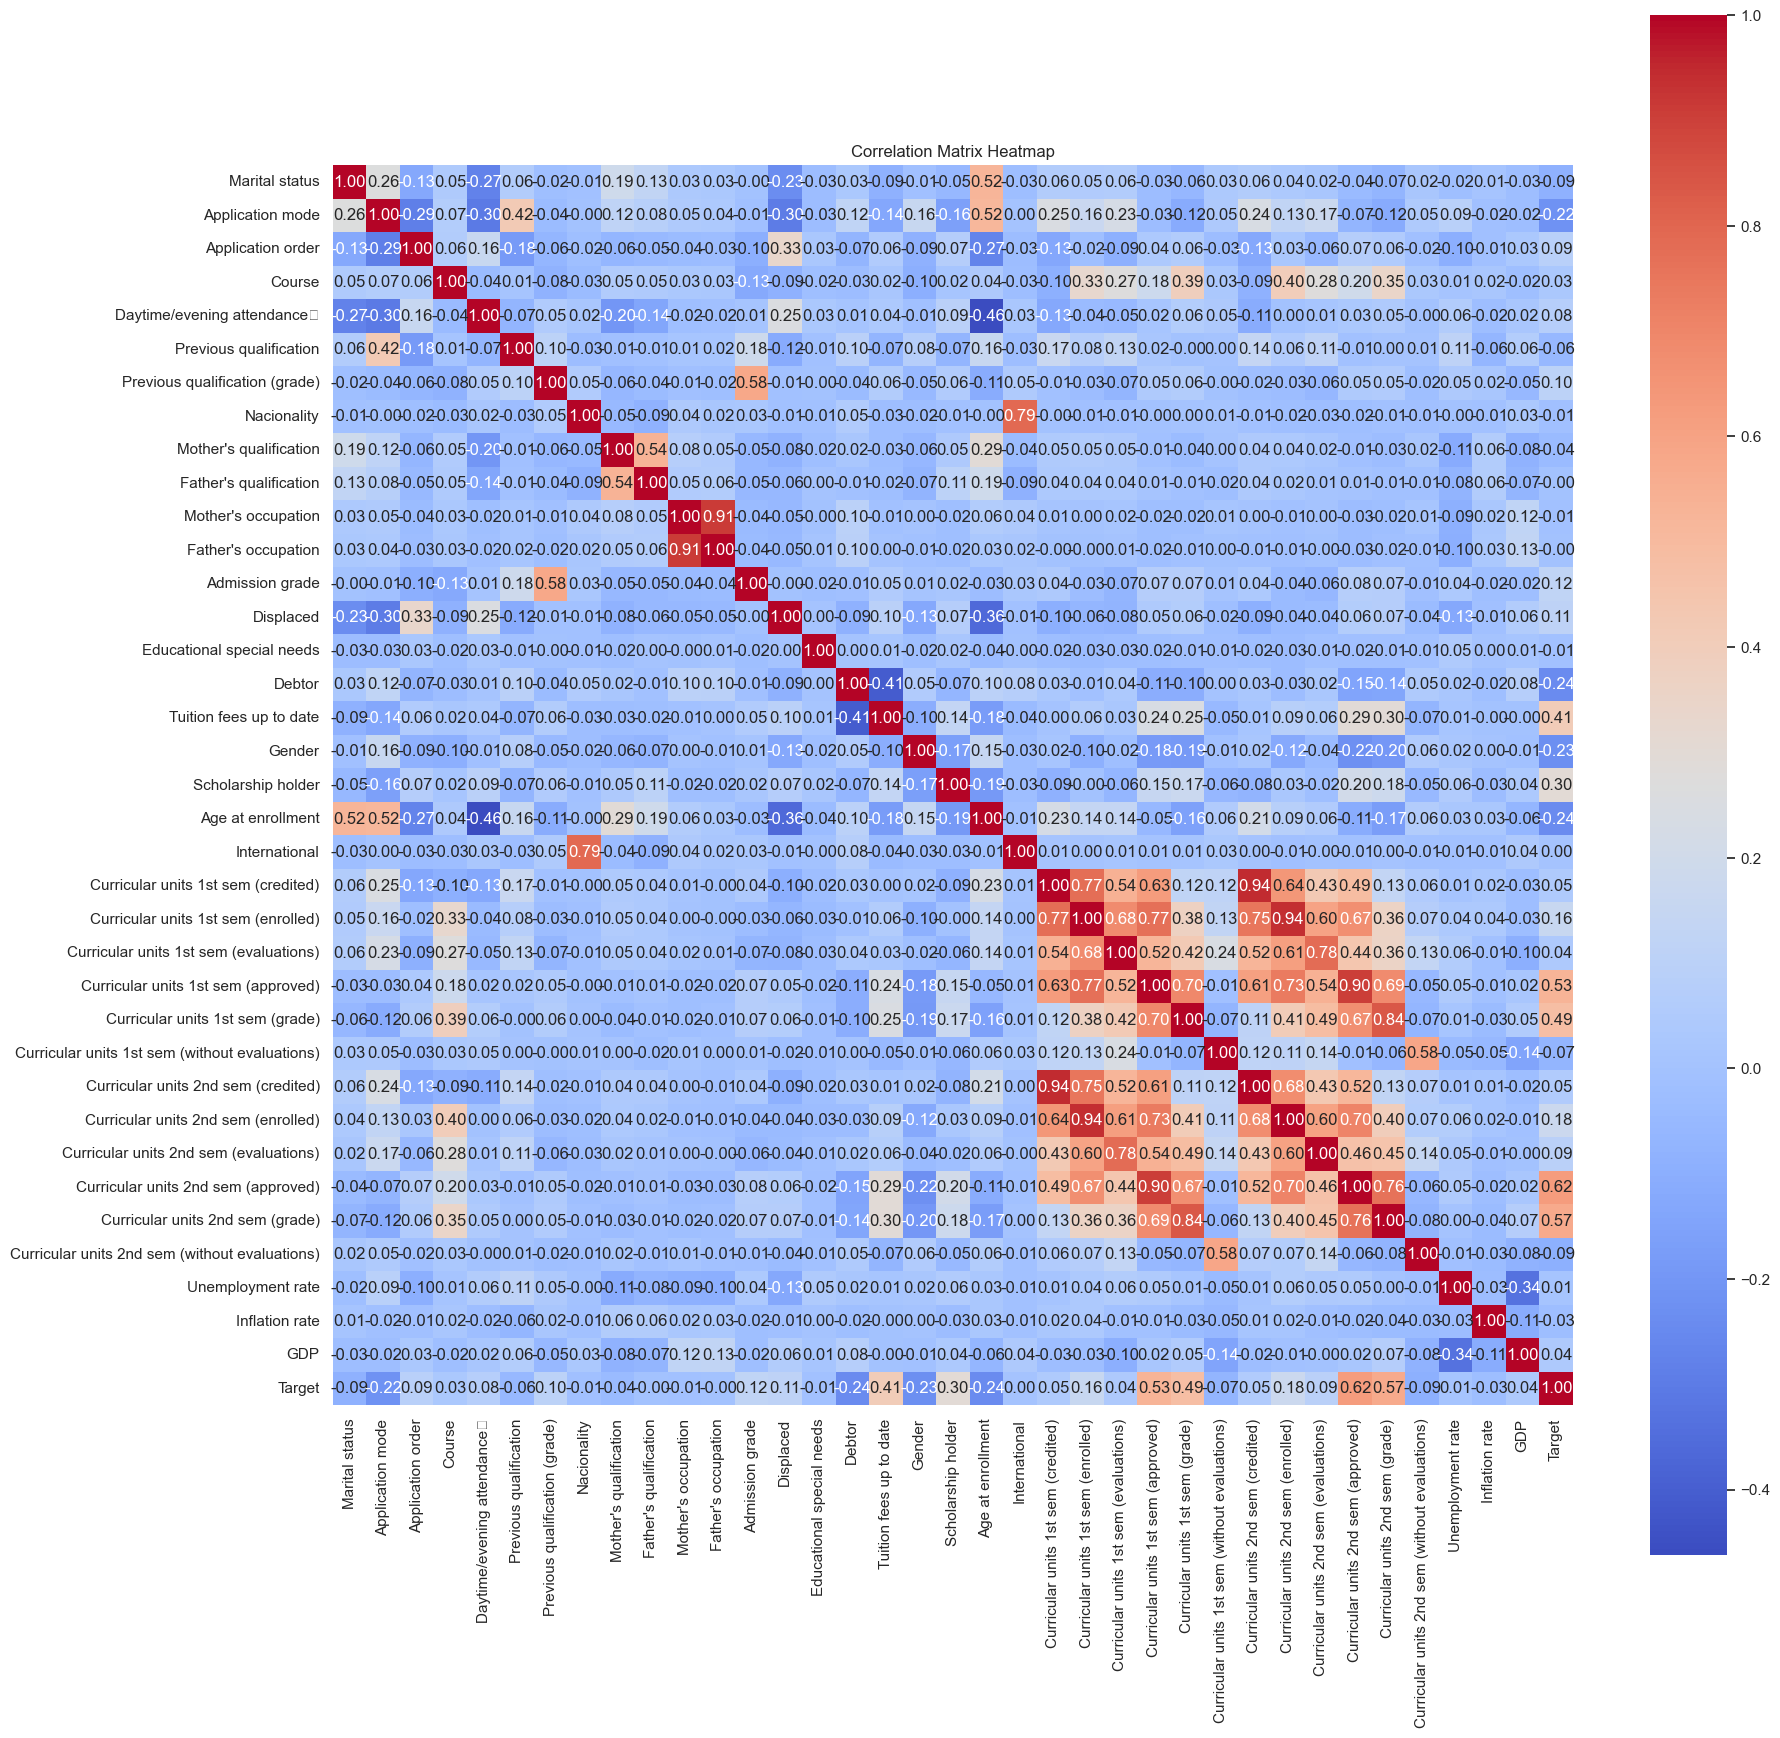

In [25]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

Figure1: A correlation matrix heat map of the features and target

In [26]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

class Dropout_import:
    """
    Sets up data for models
    """
    def __init__(self, df):

        # Create arrays for the features and the response variable
        # store for use later 
        y = df['Target'].values
        X = df.drop('Target', axis=1).values
         
        # Convert the labels to numeric labels
        y = df.Target.values.astype(object)
        encoder = preprocessing.LabelEncoder()
        encoder.fit(y)
        y = encoder.transform(y)
        
        # Create training and validation sets 
        self.train_x, self.train_y = X[:3500,:], y[:3500]
        self.val_x, self.val_y = X[3500:4424,:], y[3500:4424]

class KNN:
    """
    Class to store data for regression problems 
    """
    def __init__(self, x_train, y_train, K=5):
        """
        Creates a kNN instance

        :param x_train: numpy array with shape (n_rows,1)- e.g. [[1,2],[3,4]]
        :param y_train: numpy array with shape (n_rows,)- e.g. [1,-1]
        :param K: The number of nearest points to consider in classification
        """
        
        # Import and build the BallTree on training features 
        from sklearn.neighbors import BallTree
        self.balltree = BallTree(x_train)
        
        # Cache training labels and parameter K 
        self.y_train = y_train
        self.K = K 
        
        
    def majority(self, neighbor_indices, neighbor_distances=None):
        """
        Given indices of nearest neighbors in training set, return the majority label. 
        Break ties by considering 1 fewer neighbor until a clear winner is found. 

        :param neighbor_indices: The indices of the K nearest neighbors in self.X_train 
        :param neighbor_distances: Corresponding distances from query point to K nearest neighbors. 
        """
        labels = self.y_train[neighbor_indices]
        while True:
            majority_label = np.argmax(np.bincount(labels))
            count = np.sum(labels == majority_label)
            if count > len(labels) // 2:
                return majority_label
            
            self.K -= 1
            labels = labels[:-1]
        
            
        
    def classify(self, x):
        """
        Given a query point, return the predicted label 
        
        :param x: a query point stored as an ndarray  
        """
        dist, ind = self.balltree.query(x.reshape(1, -1), k=self.K)
        return self.majority(ind[0])
        
    def predict(self, X):
        """
        Given an ndarray of query points, return yhat, an ndarray of predictions 

        :param X: an (m x p) dimension ndarray of points to predict labels for 
        """
        predictions = []
        for x in X:
            predictions.append(self.classify(x))

        return np.array(predictions)

In [27]:
df_knn = pd.read_csv('data/dropout_data.csv', sep = ';')   
df_knn = df_knn.drop(columns = ['Marital status', 'Application mode', 'Previous qualification',
                                'Nacionality', 'Educational special needs', 'Debtor', 'Gender',
                                'Age at enrollment', 'Curricular units 1st sem (without evaluations)',
                                'Curricular units 2nd sem (without evaluations)'])
data_knn = Dropout_import(df_knn)

/Users/School/Documents/Github/ML_StudentDropoutPredictor/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  self._figure.tight_layout(*args, **kwargs)
/Users/School/Documents/Github/ML_StudentDropoutPredictor/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


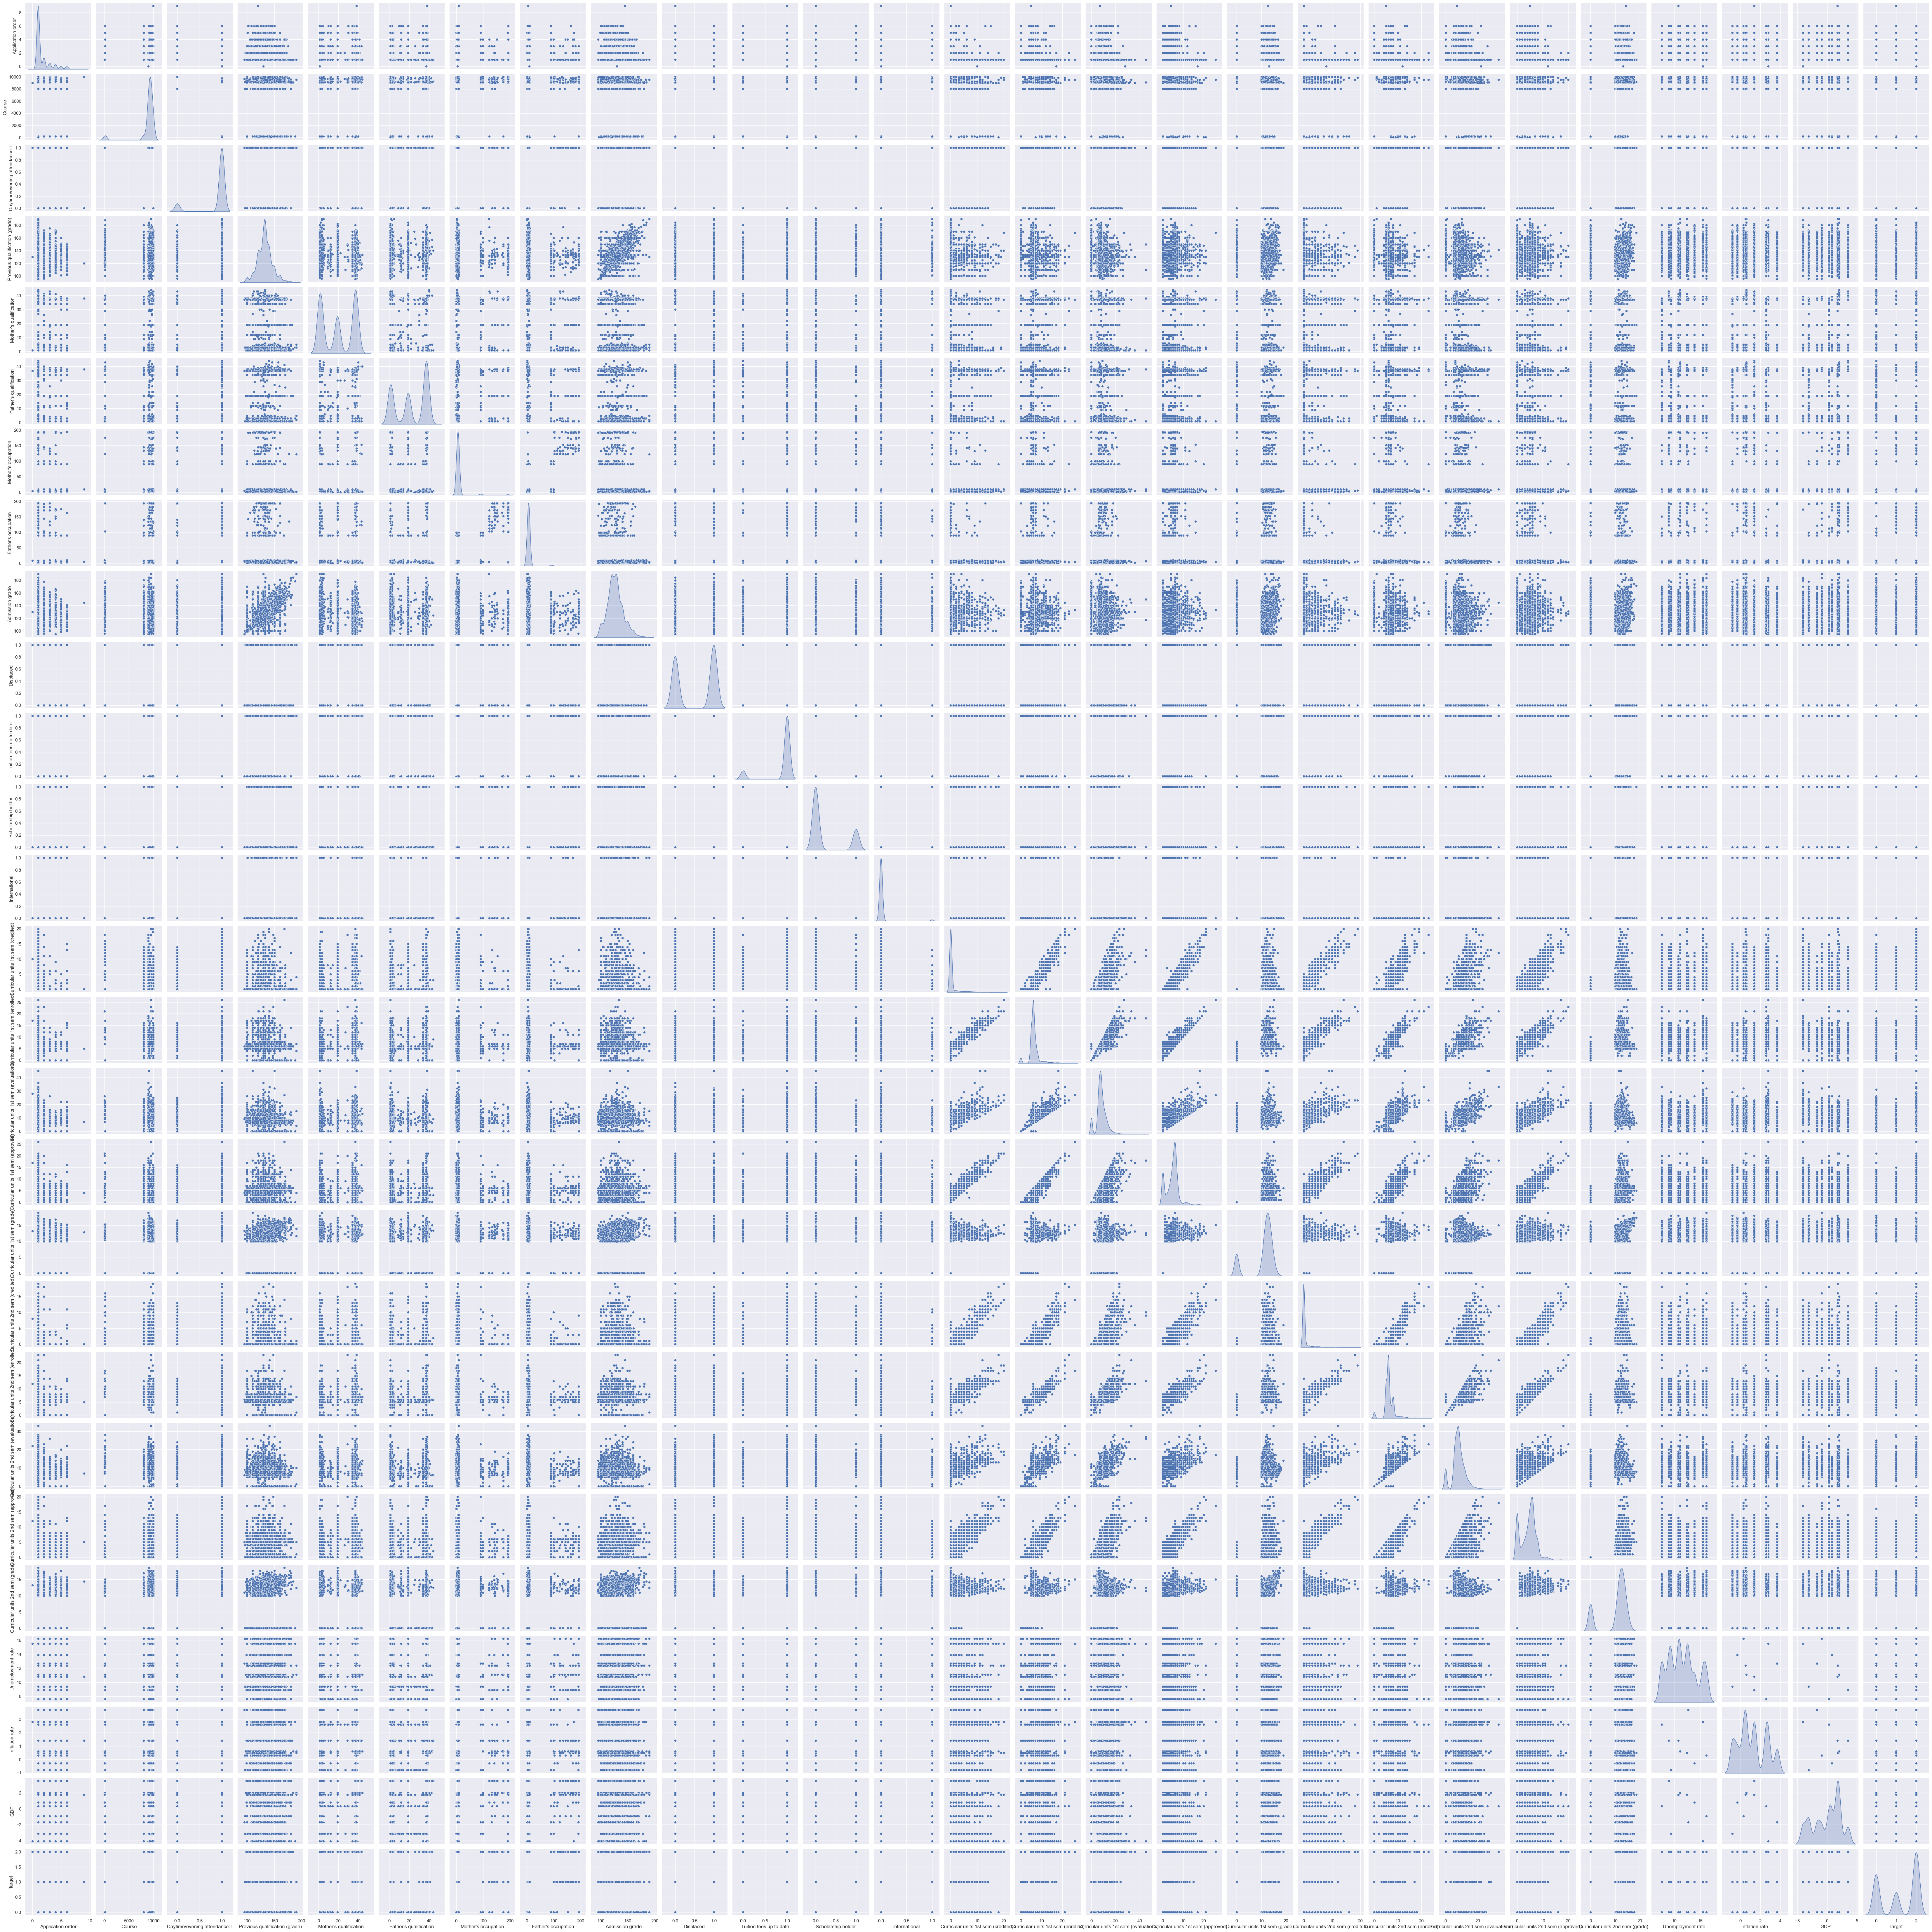

In [28]:
cols_plot = df_knn.columns[:27]
sns.pairplot(df[cols_plot], diag_kind="kde")
plt.show()

Figure2: A pairplot of each feature and target compaired to eachother.

Exploritory Data Analysis (EDA):
    Since the dataset has no NaN values for any feature, the first attribute to look at is whether or not the classification categories are balanced. In our case, the data is a little unbalanced with 'dropout' = 1421, 'enrolled' = 794, and 'graduated' = 2209 instances of each. I used SMOTE(Sythetic Minority Over-Sampling Technique) and Tomek Links to try to balance the data, but the performance of the models did not increase. Next, I created a correlation matrix heatmap and a pairplot to see if there were any features that were highly correlated and to see if there were features that were completely uncorrelated with the target. There were 10 features found to be negatively correlated with the target classifications. Removing these 10 features increased the accuracy of the KNN model by 5%; however, removing these features for the Decision Tree, Random Forest, and SVM models decreased their accuracies. 

In [29]:
# use your KNN class to perform KNN on the validation data with K = 3
knn = KNN(data_knn.train_x, data_knn.train_y, K=3)
val_yhat = knn.predict(data_knn.val_x)

# create a confusion matrix 
conf_matrix = confusion_matrix(data_knn.val_y, val_yhat)
print(conf_matrix)

[[166  59 102]
 [ 35  50  78]
 [ 38  76 320]]


Accuracy:  0.5800865800865801
Precision:  0.5800865800865801
Recall:  0.5800865800865801


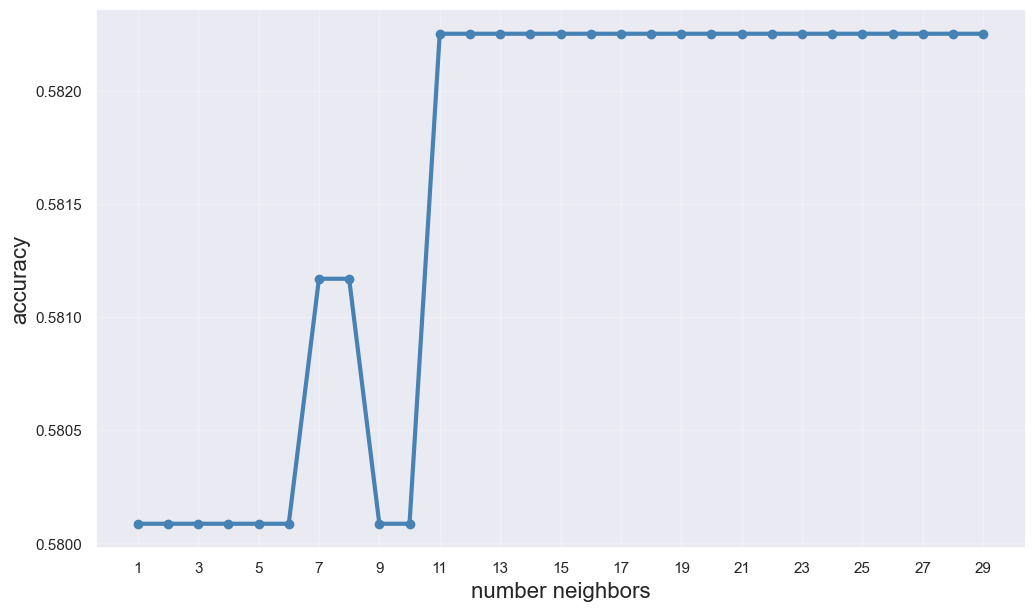

In [31]:
acc = []
wacc = []
allks = range(1, 30)

for k in allks:
    knn = KNN(data_knn.train_x, data_knn.train_y, K=k)
    y_pred = knn.predict(data_knn.val_x)
    accuracy = metrics.accuracy_score(data_knn.val_y, y_pred)
    acc.append(accuracy)
knn = KNN(data_knn.train_x, data_knn.train_y, K=6)
y_pred = knn.predict(data_knn.val_x)
accuracy = metrics.accuracy_score(data_knn.val_y, y_pred)
precision = metrics.precision_score(data_knn.val_y, y_pred, average='micro')
recall = metrics.recall_score(data_knn.val_y, y_pred, average='micro')
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(allks, acc, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
plt.xticks(range(1,31,2))
ax.grid(alpha=0.25)
plt.show()


Figure3: Accuracy vs. Number of Neighbors
This figure shows that the KNN model is most accurate when k is greater than or equal to 11.

Decision Tree Classifier Algorithm

1  Accuracy: 0.6991341991341992
2  Accuracy: 0.685064935064935
3  Accuracy: 0.711038961038961
4  Accuracy: 0.7142857142857143
5  Accuracy: 0.7326839826839827
6  Accuracy: 0.7424242424242424
7  Accuracy: 0.7359307359307359
8  Accuracy: 0.724025974025974
9  Accuracy: 0.7196969696969697
10  Accuracy: 0.7153679653679653
11  Accuracy: 0.7153679653679653
12  Accuracy: 0.7077922077922078
13  Accuracy: 0.7077922077922078
14  Accuracy: 0.7186147186147186
15  Accuracy: 0.7132034632034632
16  Accuracy: 0.698051948051948
17  Accuracy: 0.7056277056277056
18  Accuracy: 0.7002164502164502
19  Accuracy: 0.6958874458874459
20  Accuracy: 0.6904761904761905
21  Accuracy: 0.6937229437229437
22  Accuracy: 0.6915584415584416
23  Accuracy: 0.685064935064935
24  Accuracy: 0.6904761904761905
25  Accuracy: 0.685064935064935
26  Accuracy: 0.6872294372294372
27  Accuracy: 0.6883116883116883
28  Accuracy: 0.685064935064935
29  Accuracy: 0.6893939393939394


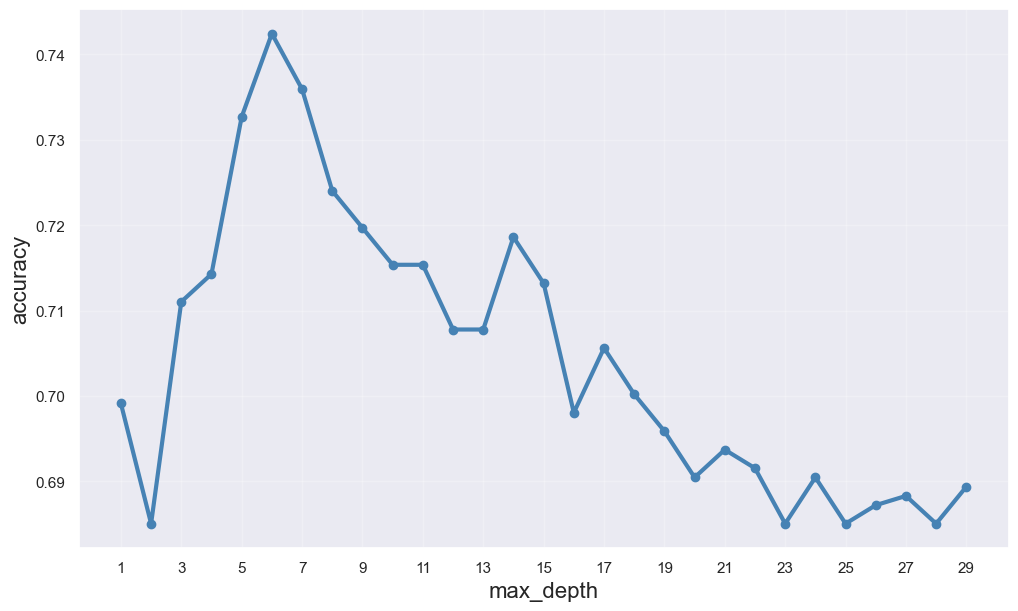

Best Accuracy: 0.7435064935064936
Best Precision: 0.7435064935064936
Best Recall: 0.7435064935064936


In [38]:
data_dtc = Dropout_import(df)
dtc_acc = []

for max_d in range(1, 30):
    dtc = DecisionTreeClassifier(max_depth = max_d)
    dtc = dtc.fit(data_dtc.train_x, data_dtc.train_y)
    y_pred = dtc.predict(data_dtc.val_x)
    print(max_d, " Accuracy:", metrics.accuracy_score(data_dtc.val_y, y_pred))
    dtc_acc.append(metrics.accuracy_score(data_knn.val_y, y_pred))
    
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))   
ax.plot(allks, dtc_acc, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("max_depth", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
plt.xticks(range(1,31,2))
ax.grid(alpha=0.25)
plt.show()

dtc = DecisionTreeClassifier(max_depth = 6)
dtc = dtc.fit(data_dtc.train_x, data_dtc.train_y)
y_pred = dtc.predict(data_dtc.val_x)
print("Best Accuracy:",metrics.accuracy_score(data_dtc.val_y, y_pred))
print("Best Precision:",metrics.precision_score(data_dtc.val_y, y_pred, average='micro'))
print("Best Recall:",metrics.recall_score(data_dtc.val_y, y_pred, average='micro'))

Figure4: max_depth vs. accuracy
This figure shows the best accuracy for the decision tree model is when max depth is set to 6.

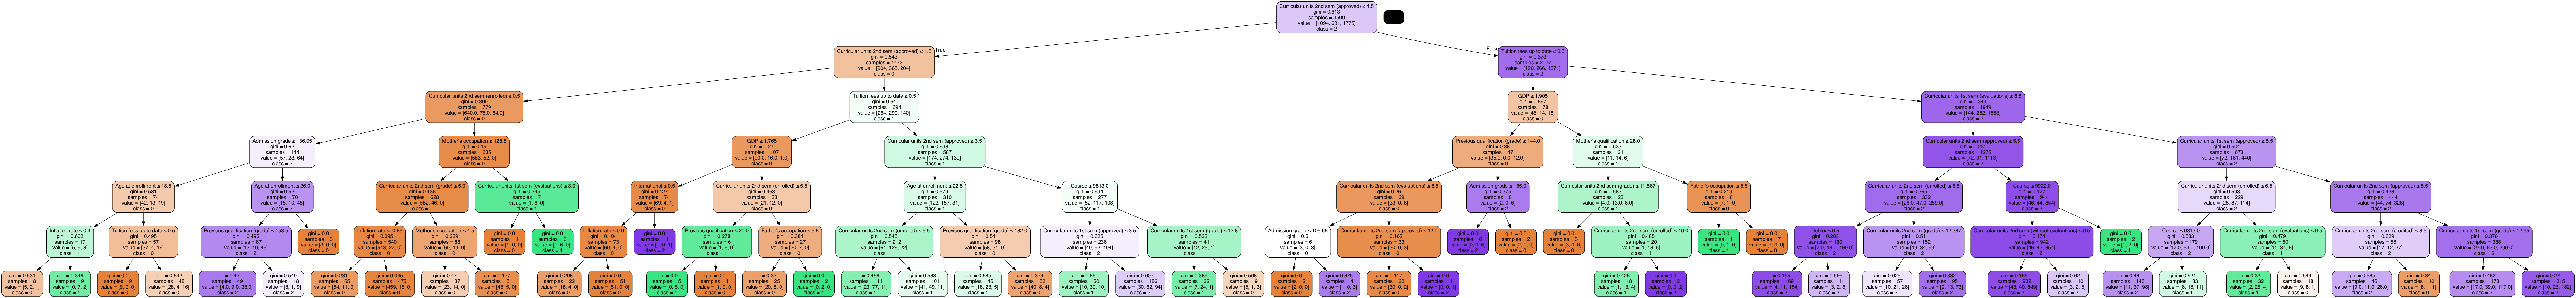

In [33]:
graph_df = df.drop(columns = ['Target'])
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = graph_df.columns,class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dropout_dtc.png')
Image(graph.create_png())

Figure5: This image shows a graph representation of the decision tree.

Random Forest Classifier Algorithm

In [37]:
rfc = RandomForestClassifier()
rfc.fit(data_dtc.train_x, data_dtc.train_y)
y_pred = rfc.predict(data_dtc.val_x)
print("Accuracy:",metrics.accuracy_score(data_dtc.val_y, y_pred))

param_dist = {'n_estimators': randint(50,500), 'max_depth': randint(1,20)}
rfc = RandomForestClassifier()
rfc_search = RandomizedSearchCV(rfc, param_distributions = param_dist, n_iter=10, cv=5)
rfc_search.fit(data_dtc.train_x, data_dtc.train_y)
best_rfc = rfc_search.best_estimator_
print('Best hyperparameters:',  rfc_search.best_params_)
y_pred = best_rfc.predict(data_dtc.val_x)
conf_matrix = confusion_matrix(data_dtc.val_y, y_pred)
print(conf_matrix)
print("Best Accuracy:",metrics.accuracy_score(data_dtc.val_y, y_pred))
print("Best Precision:",metrics.precision_score(data_dtc.val_y, y_pred, average='micro'))
print("Best Recall:",metrics.recall_score(data_dtc.val_y, y_pred, average='micro'))

Accuracy: 0.7532467532467533
Best hyperparameters: {'max_depth': 11, 'n_estimators': 110}
[[237  30  60]
 [ 30  57  76]
 [ 10  19 405]]
Best Accuracy: 0.7564935064935064
Best Precision: 0.7564935064935064
Best Recall: 0.7564935064935064


Support Vector Machine Algorithms: Linear Function, Radial Base Function, Polynomial Function, and Signmoid Function

In [35]:
df_svm = pd.read_csv('data/dropout_data.csv', sep = ';')   
df_svm = df_svm.drop(columns = ['Marital status', 'Application mode', 'Previous qualification',
                                'Nacionality', 'Educational special needs', 'Debtor', 'Gender',
                                'Age at enrollment', 'Curricular units 1st sem (without evaluations)',
                                'Curricular units 2nd sem (without evaluations)'])
data_svm = Dropout_import(df_svm)
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(data_svm.train_x, data_svm.train_y)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(data_svm.train_x, data_svm.train_y)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(data_svm.train_x, data_svm.train_y)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(data_svm.train_x, data_svm.train_y)

In [36]:
linear_pred = linear.predict(data_svm.val_x)
poly_pred = poly.predict(data_svm.val_x)
rbf_pred = rbf.predict(data_svm.val_x)
sig_pred = sig.predict(data_svm.val_x)
acc_lin = linear.score(data_svm.val_x, data_svm.val_y)
acc_poly = poly.score(data_svm.val_x, data_svm.val_y)
acc_rbf = rbf.score(data_svm.val_x, data_svm.val_y)
acc_sig = sig.score(data_svm.val_x, data_svm.val_y)
print('Accuracy Linear Kernel:', acc_lin)
print('Accuracy Polynomial Kernel:', acc_poly)
print('Accuracy Radial Basis Kernel:', acc_rbf)
print('Accuracy Sigmoid Kernel:', acc_sig)
print(confusion_matrix(data_svm.val_y, linear_pred))
print(confusion_matrix(data_svm.val_y, poly_pred))
print(confusion_matrix(data_svm.val_y, rbf_pred))
print(confusion_matrix(data_svm.val_y, sig_pred))

Accuracy Linear Kernel: 0.7402597402597403
Accuracy Polynomial Kernel: 0.4696969696969697
Accuracy Radial Basis Kernel: 0.4696969696969697
Accuracy Sigmoid Kernel: 0.4577922077922078
[[227  48  52]
 [ 34  52  77]
 [ 10  19 405]]
[[  0   0 327]
 [  0   0 163]
 [  0   0 434]]
[[  0   0 327]
 [  0   0 163]
 [  0   0 434]]
[[ 13   0 314]
 [  2   0 161]
 [ 24   0 410]]


Model Creation:
    Throughout the model creation process, I used multiple different ways to optimize each model. First, I removed the features that were not correlated with the target which only improved the accuracy of the KNN model. Second, I used an iterative approach with a for loop to plot the k value vs accuracy and the max depth vs accuracy for KNN and Devision Tree models, respectively. Third, I used the RandomizedSearchCV() function to optimize the hyperperameters for the Random Forest Algarithm. Finally, I created a SVM model with 4 different types of function.

Summary of Results:
    After creating the 7 different models, the performance list of the models based on accuracy, precision, and recall is as follow: 
    1) Random Forest Algarithm with max_depth = 11 and n_estimators = 101
    2) Decision Tree Algorithm with max_depth = 6
    3) Support Vector Machine Algorithm with a linear kernal function
    4) Kth Nearest Neighbor with k >= 11
    5) Support Vector Machine Algorithm with a polynomial kernal function
    6) Support Vector Machine Algorithm with a radial basis kernel function
    7) Support Vector Machine Algorithm with a sigmoid kernal function
    Therefore, the best optimized model for this data is the Random Forest Algorithm with max_depth = 11 and n_estimators = 101. 
Discussion:
    Building and optimizing the models went better than expected. I was supprised that kth nearest neighbore performed so poorly. I suspect that the data can be cleaned up more for a better fit model. I think for this project the sub-optimized data and lack of ROC or AUC analysis is okay, but in the future, I think is will be necessary to address the unbalanced data and perfrom ROC and AUC analysis.
    
Conclusion:
        The goal of this project was to find the best model for the data to predict a student's academic success by classifing each student as 'dropout', 'enrolled', and 'graduated'. The results found the optimal supervised machine learning algorithm to be the Ranodm Forest Algorithm with optimal hyperparameters of max_depth = 11 and n_estimators = 101. Eventhough the accuracy, precision, and recall all equal 75.64935064935064% which is very far from 100%, this project was a success because I was able to create a pretty good model. In the future with more EDA and more data, these models can be imporved to further the goal of predicting students at risk in higher education before they dropout.